In [918]:
import cv2

In [919]:
import matplotlib.pyplot as plt

In [920]:
config_file="ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frozen_model="frozen_inference_graph.pb"
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [921]:
classLabels=[]
file_name="Labels.txt"
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')


In [922]:
model.setInputSize(320, 320)
model.setInputScale(1.0/ 127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 00000179300B9410>

In [923]:
img = cv2.imread('Hornet4.jpg')

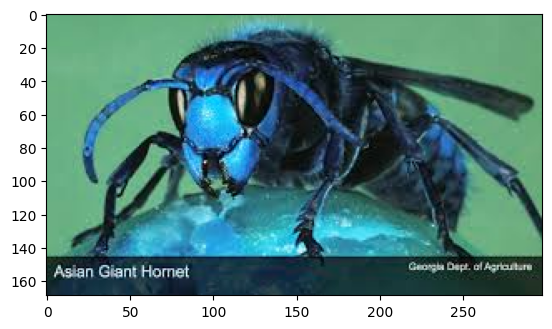

In [924]:
plt.imshow(img)

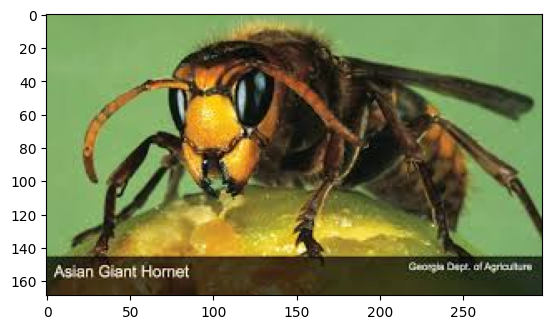

In [925]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [926]:
ClassIndex,confidece,bbox= model.detect(img,confThreshold=0.5)

In [927]:
print(ClassIndex)

[16]


In [928]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidece.flatten(),bbox):
    cv2.rectangle(img,boxes,(200,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font ,fontScale=font_scale,color=(0,255,0),thickness=3)

In [929]:
# plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
if(classLabels[ClassInd-1]=="hornet"):
    from playsound import playsound
    playsound("I:\\object detection\\Compressed\\bees.mp3")